# House Sales in King County - Project 1 Regression

___

#### Data Set Information:
The description for the 20 features is given below:

- id : It is the unique numeric number assigned to each house being sold.
- date : It is the date on which the house was sold out.
- price: It is the price of house which we have to predict so this is our target variable and aprat from it are our features.
- bedrooms : It determines number of bedrooms in a house.
- bathrooms : It determines number of bathrooms in a bedroom of a house.
- sqft_living : It is the measurement variable which determines the measurement of house in square foot.
- sqft_lot : It is also the measurement variable which determines square foot of the lot.
- floors: It determines total floors means levels of house.
- waterfront : This feature determines whether a house has a view to waterfront 0 means no 1 means yes.
- view : This feature determines whether a house has been viewed or not 0 means no 1 means yes.
- condition : It determines the overall condition of a house on a scale of 1 to 5.
- grade : It determines the overall grade given to the housing unit, based on King County grading system on a scale of 1 to 11.
- sqft_above : It determines square footage of house apart from basement.
- sqft_basement : It determines square footage of the basement of the house.
- yr_built : It detrmines the date of building of the house.
- yr_renovated : It detrmines year of renovation of house.
- zipcode : It determines the zipcode of the location of the house.
- lat : It determines the latitude of the location of the house.
- long : It determines the longitude of the location of the house.
- sqft_living15 : Living room area in 2015(implies-- some renovations)
- sqft_lot15 : lotSize area in 2015(implies-- some renovations)

## Data Exploration

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df1 = pd.read_csv ('kc_house_data.csv')
df1.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [2]:
# At least 15 features (columns)
# At least 1000 instances (rows)
df1.shape

(21613, 21)

In [3]:
df1.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [4]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  int64  
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [5]:
df1.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [6]:
#Randomly mask valuee in our dataframe to meet the project requirment of missing value
# Between 5 to 10 percent missing values across the dataset.
np.random.seed(0)
df1_wNaN = df1.mask(np.random.random(df1.shape) < .1)

In [7]:
df1_wNaN.isnull().sum()

id               2190
date             2173
price            2268
bedrooms         2146
bathrooms        2180
sqft_living      2132
sqft_lot         2242
floors           2171
waterfront       2097
view             2124
condition        2221
grade            2263
sqft_above       2164
sqft_basement    2191
yr_built         2163
yr_renovated     2198
zipcode          2210
lat              2189
long             2181
sqft_living15    2131
sqft_lot15       2176
dtype: int64

In [8]:
df1_wNaN.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7.129301e+09,20141013T000000,221900.0,3.0,1.00,1180.0,5650.0,1.0,0.0,0.0,...,7.0,1180.0,0.0,NaN,NaN,NaN,47.5112,-122.257,1340.0,5650.0
1,6.414100e+09,20141209T000000,538000.0,3.0,2.25,2570.0,7242.0,2.0,0.0,0.0,...,7.0,2170.0,NaN,1951.0,1991.0,98125.0,47.7210,-122.319,1690.0,7639.0
2,5.631500e+09,NaN,180000.0,2.0,1.00,770.0,10000.0,1.0,0.0,0.0,...,6.0,770.0,0.0,1933.0,0.0,98028.0,47.7379,-122.233,2720.0,8062.0
3,2.487201e+09,20141209T000000,604000.0,4.0,NaN,1960.0,NaN,1.0,0.0,0.0,...,7.0,NaN,910.0,1965.0,0.0,98136.0,47.5208,-122.393,NaN,5000.0
4,1.954401e+09,20150218T000000,510000.0,NaN,2.00,1680.0,8080.0,1.0,0.0,0.0,...,8.0,1680.0,NaN,1987.0,NaN,98074.0,47.6168,-122.045,1800.0,7503.0


In [9]:
#Impute the missing value by fillna function with pad method 
#since supervised machine learning model cannot handle NaN.
df1_clean = df1_wNaN.fillna(method='pad')
df1_clean.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7.129301e+09,20141013T000000,221900.0,3.0,1.00,1180.0,5650.0,1.0,0.0,0.0,...,7.0,1180.0,0.0,NaN,NaN,NaN,47.5112,-122.257,1340.0,5650.0
1,6.414100e+09,20141209T000000,538000.0,3.0,2.25,2570.0,7242.0,2.0,0.0,0.0,...,7.0,2170.0,0.0,1951.0,1991.0,98125.0,47.7210,-122.319,1690.0,7639.0
2,5.631500e+09,20141209T000000,180000.0,2.0,1.00,770.0,10000.0,1.0,0.0,0.0,...,6.0,770.0,0.0,1933.0,0.0,98028.0,47.7379,-122.233,2720.0,8062.0
3,2.487201e+09,20141209T000000,604000.0,4.0,1.00,1960.0,10000.0,1.0,0.0,0.0,...,7.0,770.0,910.0,1965.0,0.0,98136.0,47.5208,-122.393,2720.0,5000.0
4,1.954401e+09,20150218T000000,510000.0,4.0,2.00,1680.0,8080.0,1.0,0.0,0.0,...,8.0,1680.0,910.0,1987.0,0.0,98074.0,47.6168,-122.045,1800.0,7503.0


In [10]:
df1_clean.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         1
yr_renovated     1
zipcode          1
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [11]:
df1_1 = df1.copy() 

In [12]:
# change view to binary 
df1_1.view[df1.view < 1] = 0 
df1_1.view[df1.view >= 1] = 1 

<ipython-input-12-5475cda71e8b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1_1.view[df1.view < 1] = 0
<ipython-input-12-5475cda71e8b>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1_1.view[df1.view >= 1] = 1


In [13]:
# change waterfront to binary 
df1_1.view[df1.waterfront < 1] = 0 
df1_1.view[df1.waterfront >= 1] = 1 

<ipython-input-13-b426a7bdbda4>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1_1.view[df1.waterfront < 1] = 0
<ipython-input-13-b426a7bdbda4>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1_1.view[df1.waterfront >= 1] = 1


In [14]:
df1_1.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [15]:
# Make view as binary 
print(np.unique(df1_1['view']))

[0 1]


In [16]:
# Make waterfront is a binary
print(np.unique(df1_1['waterfront']))

[0 1]


In [17]:
# Delete nominal 
df1_1.drop(['id', 'date', 'zipcode'], axis = 1, inplace = True)

In [18]:
df1_1.isnull().values.any()

False

In [19]:
df1_1.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15
0,221900,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,47.5112,-122.257,1340,5650
1,538000,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,47.7210,-122.319,1690,7639
2,180000,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,47.7379,-122.233,2720,8062
3,604000,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,47.5208,-122.393,1360,5000
4,510000,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,47.6168,-122.045,1800,7503


In [20]:
# Import modules
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

In [21]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [22]:
df1_1.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15
count,21613.000,21613.000,21613.000,21613.000,21613.000,21613.000,21613.000,21613.000,21613.000,21613.000,21613.000,21613.000,21613.000,21613.000,21613.000,21613.000,21613.000,21613.000
mean,540088.142,3.371,2.115,2079.900,15106.968,1.494,0.008,0.008,3.409,7.657,1788.391,291.509,1971.005,84.402,47.560,-122.214,1986.552,12768.456
std,367127.196,0.930,0.770,918.441,41420.512,0.540,0.087,0.087,0.651,1.175,828.091,442.575,29.373,401.679,0.139,0.141,685.391,27304.180
min,75000.000,0.000,0.000,290.000,520.000,1.000,0.000,0.000,1.000,1.000,290.000,0.000,1900.000,0.000,47.156,-122.519,399.000,651.000
25%,321950.000,3.000,1.750,1427.000,5040.000,1.000,0.000,0.000,3.000,7.000,1190.000,0.000,1951.000,0.000,47.471,-122.328,1490.000,5100.000
50%,450000.000,3.000,2.250,1910.000,7618.000,1.500,0.000,0.000,3.000,7.000,1560.000,0.000,1975.000,0.000,47.572,-122.230,1840.000,7620.000
75%,645000.000,4.000,2.500,2550.000,10688.000,2.000,0.000,0.000,4.000,8.000,2210.000,560.000,1997.000,0.000,47.678,-122.125,2360.000,10083.000
max,7700000.000,33.000,8.000,13540.000,1651359.000,3.500,1.000,1.000,5.000,13.000,9410.000,4820.000,2015.000,2015.000,47.778,-121.315,6210.000,871200.000


In [23]:
df1_1['bedrooms'].value_counts()

3     9824
4     6882
2     2760
5     1601
6      272
1      199
7       38
8       13
0       13
9        6
10       3
11       1
33       1
Name: bedrooms, dtype: int64

In [24]:
df1_1['waterfront'].value_counts()

0    21450
1      163
Name: waterfront, dtype: int64

In [25]:
df1_1['grade'].value_counts()

7     8981
8     6068
9     2615
6     2038
10    1134
11     399
5      242
12      90
4       29
13      13
3        3
1        1
Name: grade, dtype: int64

C:\Users\utdal\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='bedrooms', ylabel='count'>

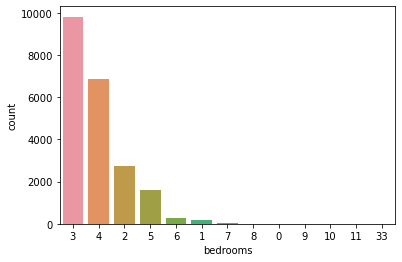

In [26]:
sns.countplot(df1_1.bedrooms, order = df1['bedrooms'].value_counts().index)

No handles with labels found to put in legend.


<AxesSubplot:title={'center':'House prices by sqft_living'}, xlabel='sqft_living', ylabel='price'>

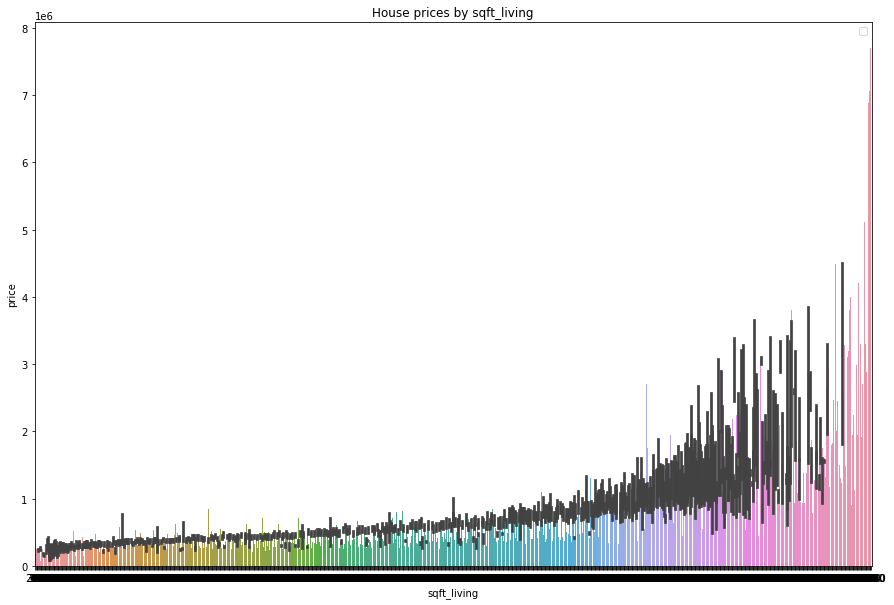

In [27]:
fig,axes = plt.subplots(nrows=1,ncols=1, figsize=(15,10))
plt.title('House prices by sqft_living')
plt.xlabel('sqft_living')
plt.ylabel('House Prices')
plt.legend()
sns.barplot(x='sqft_living', y='price', data = df1_1)

No handles with labels found to put in legend.


<AxesSubplot:title={'center':'House prices by sqft_living'}, xlabel='sqft_above', ylabel='price'>

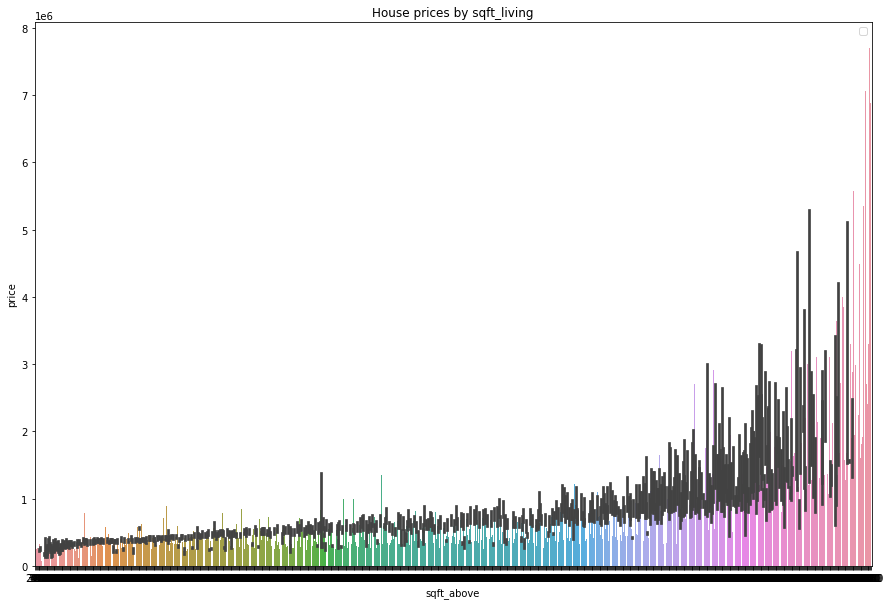

In [28]:
fig,axes = plt.subplots(nrows=1,ncols=1, figsize=(15,10))
plt.title('House prices by sqft_living')
plt.xlabel('sqft_above')
plt.ylabel('House Prices')
plt.legend()
sns.barplot(x='sqft_above', y='price', data = df1)

(array([1.825e+04, 3.255e+03, 1.010e+02, 5.000e+00, 2.000e+00]),
 array([  290.,  2940.,  5590.,  8240., 10890., 13540.]),
 <BarContainer object of 5 artists>)

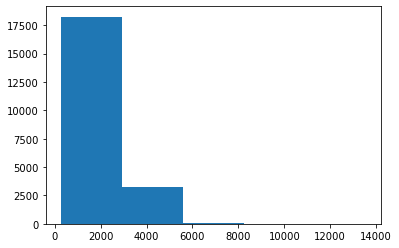

In [29]:
plt.hist('sqft_living', data = df1_1, bins = 5)

C:\Users\utdal\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='sqft_living', ylabel='Density'>

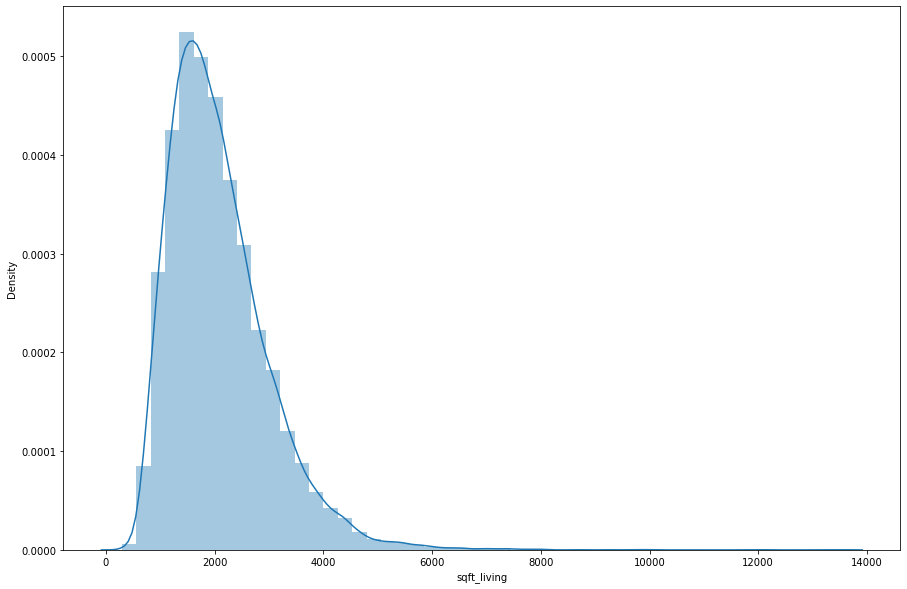

In [30]:
fig,axes = plt.subplots(nrows=1,ncols=1, figsize=(15,10))
sns.distplot(df1_1['sqft_living'], hist=True, kde=True, rug=False, label='sqft_living', norm_hist=True)

In [31]:
#Finding out mean, median & mode
print('Mean', round(df1_1['sqft_living'].mean(), 2))
print('Median', df1_1['sqft_living'].median())
print('Mode', df1_1['sqft_living'].mode()[0])

Mean 2079.9
Median 1910.0
Mode 1300


In [32]:
len(df1_1[df1_1['sqft_living']==1300])

138

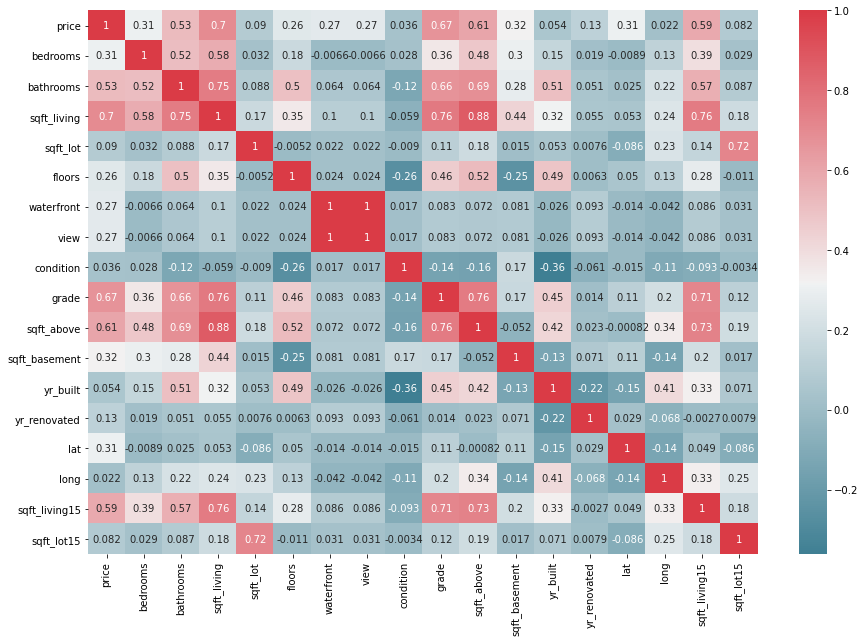

In [33]:
def correlation_heatmap(df1_1):
    _, ax = plt.subplots(figsize = (15, 10))
    colormap= sns.diverging_palette(220, 10, as_cmap = True)
    sns.heatmap(df1_1.corr(), annot=True, cmap = colormap)

correlation_heatmap(df1_1)

## Scaling Data

In [34]:
X = df1_1.drop(['price'],axis=1)
y = df1_1['price']

In [35]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [36]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

X_train_org, X_test_org, y_train, y_test = train_test_split(X,y, random_state = 0)

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train_org)
X_test = scaler.transform(X_test_org)

In [37]:
X_train

array([[0.03030303, 0.125     , 0.05056604, ..., 0.54211843, 0.16126773,
        0.0229731 ],
       [0.09090909, 0.21875   , 0.09207547, ..., 0.21351126, 0.19628787,
        0.01094602],
       [0.09090909, 0.28125   , 0.10415094, ..., 0.10675563, 0.30309928,
        0.00744506],
       ...,
       [0.09090909, 0.28125   , 0.15622642, ..., 0.2969141 , 0.40640868,
        0.01602018],
       [0.12121212, 0.25      , 0.15698113, ..., 0.19599666, 0.29959727,
        0.02178824],
       [0.12121212, 0.28125   , 0.15773585, ..., 0.32860717, 0.32060935,
        0.00964919]])

In [38]:
X.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15
0,3,1.000,1180,5650,1.000,0,0,3,7,1180,0,1955,0,47.511,-122.257,1340,5650
1,3,2.250,2570,7242,2.000,0,0,3,7,2170,400,1951,1991,47.721,-122.319,1690,7639
2,2,1.000,770,10000,1.000,0,0,3,6,770,0,1933,0,47.738,-122.233,2720,8062
3,4,3.000,1960,5000,1.000,0,0,5,7,1050,910,1965,0,47.521,-122.393,1360,5000
4,3,2.000,1680,8080,1.000,0,0,3,8,1680,0,1987,0,47.617,-122.045,1800,7503


## Regression

### KNN Regressor

Text(0, 0.5, 'MSE')

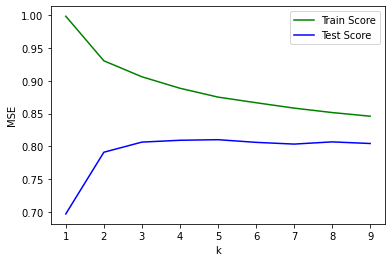

In [39]:
%matplotlib inline
train_score_array = []
test_score_array = []

for k in range(1,10):
    knn_reg = KNeighborsRegressor(k)
    knn_reg.fit(X_train, y_train)
    train_score_array.append(knn_reg.score(X_train, y_train))
    test_score_array.append(knn_reg.score(X_test, y_test))

x_axis = range(1,10)
plt.plot(x_axis, train_score_array, c = 'g', label = 'Train Score')
plt.plot(x_axis, test_score_array, c = 'b', label = 'Test Score')
plt.legend()
plt.xlabel('k')
plt.ylabel('MSE')

In [40]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

param_grid = {'n_neighbors': [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]}

grid_knn = GridSearchCV(KNeighborsRegressor(), param_grid, cv=5, return_train_score=True)
grid_knn.fit(X_train, y_train)

print("Best parameters: {}".format(grid_knn.best_params_))

Best parameters: {'n_neighbors': 6}


In [41]:
print('Mean Train Score',grid_knn.cv_results_['mean_train_score'])
print('Mean Test Score',grid_knn.cv_results_['mean_test_score'])

print('R-squared score (training): {:.3f}'
     .format(grid_knn.score(X_train, y_train)))
print('R-squared score (test): {:.3f}'
     .format(grid_knn.score(X_test, y_test)))

Mean Train Score [0.9987366  0.9288522  0.90254276 0.88323939 0.86991507 0.86031841
 0.85195681 0.84532497 0.83846037 0.83193697 0.82723677 0.82303756
 0.81979978 0.81643458 0.81278055]
Mean Test Score [0.714806   0.77962883 0.7946427  0.80030207 0.80159217 0.80174817
 0.799678   0.79751855 0.79539343 0.79436594 0.79305563 0.79216492
 0.79027454 0.78877783 0.78755265]
R-squared score (training): 0.867
R-squared score (test): 0.806


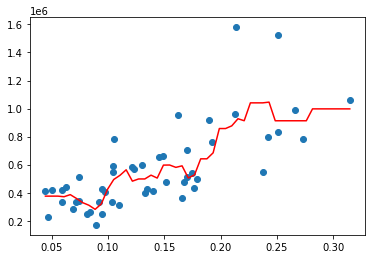

In [42]:
#CRIM and AGE
X_b = X_train[:50,2].reshape(-1,1)
y_b = y_train[:50]

knn_reg = KNeighborsRegressor(6)
knn_reg.fit(X_b, y_b)

X_new=np.linspace(X_b.min(), X_b.max(), 50).reshape(50, 1)
y_predict = knn_reg.predict(X_new)

plt.plot(X_new, y_predict, c = 'r')
plt.scatter(X_b, y_b)

### Linear regression using the Normal Equation

In [43]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

X_train_org, X_test_org, y_train, y_test = train_test_split(X,y, random_state = 0)

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train_org)
X_test = scaler.transform(X_test_org)

In [44]:
from sklearn.linear_model import LinearRegression

lreg = LinearRegression()
lreg.fit(X_train, y_train)

print('R-squared score (Training): {:.4f}'
     .format(lreg.score(X_train, y_train)))
print('R-squared score (Test): {:.4f}'
     .format(lreg.score(X_test, y_test)))

R-squared score (Training): 0.6920
R-squared score (Test): 0.6745


#### Cross-Validation

In [46]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

lreg = LinearRegression()

scores = cross_val_score(lreg, X_train, y_train)
print("Cross-validation scores: {}".format(scores))

Cross-validation scores: [0.68494329 0.63999291 0.69412    0.71180156 0.69929664]


In [47]:
scores = cross_val_score(lreg, X_train, y_train, cv=5)
print("Cross-validation scores: {}".format(scores))

Cross-validation scores: [0.68494329 0.63999291 0.69412    0.71180156 0.69929664]


In [48]:
print("Average cross-validation score: {:.4f}".format(scores.mean()))

Average cross-validation score: 0.6860


### Polynomial regression

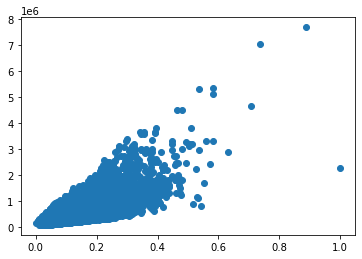

In [49]:
from  sklearn.preprocessing  import PolynomialFeatures

X_train_1 = X_train[:,2].reshape(-1,1)
plt.scatter(X_train_1,y_train)

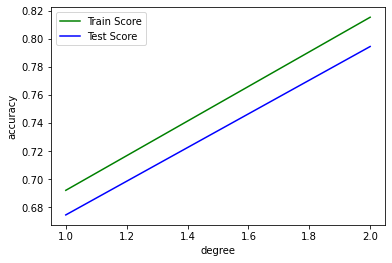

In [50]:
train_score_list = []
test_score_list = []

for n in range(1,3):
    poly = PolynomialFeatures(n)
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.transform(X_test)
    lreg.fit(X_train_poly, y_train)
    train_score_list.append(lreg.score(X_train_poly, y_train))
    test_score_list.append(lreg.score(X_test_poly, y_test))
    
%matplotlib inline

x_axis = range(1,3)
plt.plot(x_axis, train_score_list, c = 'g', label = 'Train Score')
plt.plot(x_axis, test_score_list, c = 'b', label = 'Test Score')
plt.xlabel('degree')
plt.ylabel('accuracy')
plt.legend()

In [51]:
print(train_score_list)
print(test_score_list)

[0.692016808123084, 0.8153483356365234]
[0.6744899982132856, 0.7944915298444326]


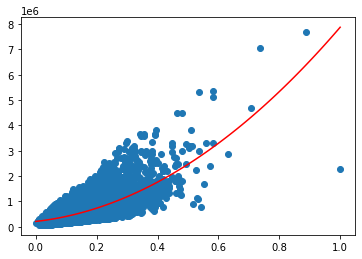

In [52]:
poly = PolynomialFeatures(n)

X_train_poly = poly.fit_transform(X_train_1)
lreg.fit(X_train_poly, y_train)

x_axis = np.linspace(0,1,100).reshape(-1,1)
x_poly = poly.transform(x_axis)
y_predict = lreg.predict(x_poly)

X_train_1 = X_train[:,2].reshape(-1,1)
plt.scatter(X_train_1,y_train)
plt.plot(x_axis, y_predict, c = 'r')

#### Cross-Validation

In [53]:
from sklearn.preprocessing  import PolynomialFeatures
from sklearn.model_selection import cross_val_score

# poly = PolynomialFeatures(n)
poly = PolynomialFeatures(degree=2, include_bias=True, interaction_only=False,order='C')


scores = cross_val_score(lreg, X_train, y_train)
print("Cross-validation scores: {}".format(scores))

Cross-validation scores: [0.68494329 0.63999291 0.69412    0.71180156 0.69929664]


In [54]:
scores = cross_val_score(lreg, X_train, y_train, cv=5)
print("Cross-validation scores: {}".format(scores))

Cross-validation scores: [0.68494329 0.63999291 0.69412    0.71180156 0.69929664]


In [55]:
print("Average cross-validation score: {:.2f}".format(scores.mean()))

Average cross-validation score: 0.69


### Ridge Model (L2 regularization)

In [56]:
from  sklearn.linear_model import Ridge

x_range = [0.01, 0.1, 1, 10, 100]
train_score_list = []
test_score_list = []

for alpha in x_range: 
    ridge = Ridge(alpha)
    ridge.fit(X_train,y_train)
    train_score_list.append(ridge.score(X_train,y_train))
    test_score_list.append(ridge.score(X_test, y_test))

Text(0.5, 0, '$\\alpha$')

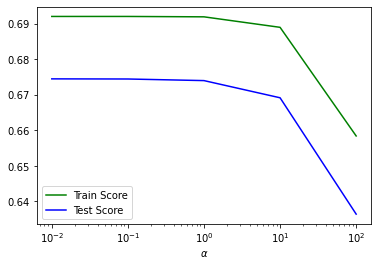

In [57]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(x_range, train_score_list, c = 'g', label = 'Train Score')
plt.plot(x_range, test_score_list, c = 'b', label = 'Test Score')
plt.xscale('log')
plt.legend(loc = 3)
plt.xlabel(r'$\alpha$')

In [58]:
param_grid = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100]}

grid_ridge = GridSearchCV(Ridge(), param_grid, cv=5, return_train_score=True)
grid_ridge.fit(X_train,y_train)

print("Best parameters: {}".format(grid_ridge.best_params_))

print('R-squared score (training): {:.4f}'
     .format(grid_ridge.score(X_train,y_train)))
print('R-squared score (test): {:.4f}'
     .format(grid_ridge.score(X_test,y_test)))

Best parameters: {'alpha': 1}
R-squared score (training): 0.6919
R-squared score (test): 0.6740


This suggests that the best  𝛼  parameter is 1

In [59]:
print(train_score_list)
print(test_score_list)

[0.69201568807429, 0.6920143129835555, 0.6919067260445237, 0.6889554054538662, 0.658413595167223]
[0.6744655510608004, 0.6744276796511777, 0.6739783820329697, 0.6691486304144849, 0.6364401920291536]


In [60]:
ridge = Ridge(alpha = 0.001)
ridge.fit(X_train,y_train)
print('Train score: {:.4f}'.format(ridge.score(X_train,y_train)))
print('Test score: {:.4f}'.format(ridge.score(X_test, y_test)))

Train score: 0.6920
Test score: 0.6745


In [61]:
ridge.coef_

array([-1139695.89947779,   286831.91392782,   869486.95690899,
         364060.027607  ,    20999.609246  ,   380566.43571101,
         380566.43569948,   125985.57431183,  1193394.68168215,
        1003039.46878316,   492319.9631343 ,  -293848.08238189,
          52384.10130001,   340066.79576659,  -170298.75431955,
         256135.33348872,  -363947.97099371])

In [62]:
ridge.intercept_

-547094.939516844

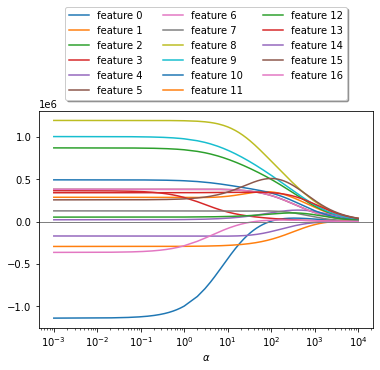

In [63]:
%matplotlib inline
import numpy as np

x_range1 = np.linspace(0.001, 1, 100).reshape(-1,1)
x_range2 = np.linspace(1, 10000, 10000).reshape(-1,1)

x_range = np.append(x_range1, x_range2)
coeff = []

for alpha in x_range: 
    ridge = Ridge(alpha)
    ridge.fit(X_train,y_train)
    coeff.append(ridge.coef_ )
    
coeff = np.array(coeff)

for i in range(0,17):
    plt.plot(x_range, coeff[:,i], label = 'feature {:d}'.format(i))

plt.axhline(y=0, xmin=0.001, xmax=9999, linewidth=1, c ='gray')
plt.xlabel(r'$\alpha$')
plt.xscale('log')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.5),
          ncol=3, fancybox=True, shadow=True)
plt.show()

#### Cross-Validation

In [64]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_score

ridge = Ridge(alpha = 1)

scores = cross_val_score(ridge, X_train, y_train)
print("Cross-validation scores: {}".format(scores))

Cross-validation scores: [0.68391578 0.64069824 0.69319552 0.71352304 0.69928295]


In [65]:
scores = cross_val_score(ridge, X_train, y_train, cv=5)
print("Cross-validation scores: {}".format(scores))

Cross-validation scores: [0.68391578 0.64069824 0.69319552 0.71352304 0.69928295]


In [66]:
print("Average cross-validation score: {:.2f}".format(scores.mean()))

Average cross-validation score: 0.69


### Lasso Model (L1 regularization)

In [67]:
from sklearn.linear_model import Lasso
x_range = [0.01, 0.1, 1, 10, 100]
train_score_list = []
test_score_list = []

for alpha in x_range: 
    lasso = Lasso(alpha)
    lasso.fit(X_train,y_train)
    train_score_list.append(lasso.score(X_train,y_train))
    test_score_list.append(lasso.score(X_test, y_test))

C:\Users\utdal\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 14725827286423.438, tolerance: 219486685028.40982
  model = cd_fast.enet_coordinate_descent(
C:\Users\utdal\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 14740836070554.812, tolerance: 219486685028.40982
  model = cd_fast.enet_coordinate_descent(
C:\Users\utdal\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 14878693162421.875, tolerance: 219486685028.40982
  model = cd_fast.enet_coordinate_descent(


Text(0.5, 0, '$\\alpha$')

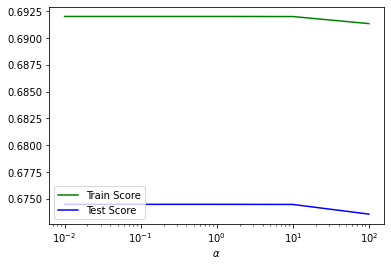

In [68]:
plt.plot(x_range, train_score_list, c = 'g', label = 'Train Score')
plt.plot(x_range, test_score_list, c = 'b', label = 'Test Score')
plt.xscale('log')
plt.legend(loc = 3)
plt.xlabel(r'$\alpha$')

In [69]:
param_grid = {'alpha': [0.01, 0.1, 1, 10, 100], 'max_iter':[10000]}

grid_lasso = GridSearchCV(Lasso(), param_grid, cv=5, return_train_score=True)
grid_lasso.fit(X_train,y_train)

print("Best parameters: {}".format(grid_lasso.best_params_))

print('R-squared score (training): {:.4f}'
     .format(grid_lasso.score(X_train,y_train)))
print('R-squared score (test): {:.4f}'
     .format(grid_lasso.score(X_test,y_test)))

C:\Users\utdal\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 11231550268291.25, tolerance: 166951828249.66364
  model = cd_fast.enet_coordinate_descent(
C:\Users\utdal\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 11619472525954.75, tolerance: 185584966624.32935
  model = cd_fast.enet_coordinate_descent(
C:\Users\utdal\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 11429084309196.875, tolerance: 167135413376.38696
  model = cd_fast.enet_coordinate_descent(
C:\Users\utdal\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWa

Best parameters: {'alpha': 10, 'max_iter': 10000}
R-squared score (training): 0.6920
R-squared score (test): 0.6745


Text(0, 0.5, 'Price')

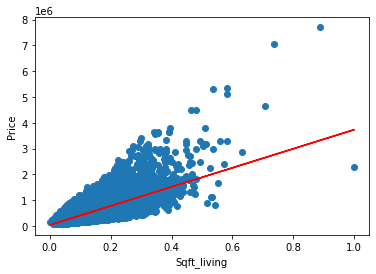

In [70]:
%matplotlib inline
import matplotlib.pyplot as plt

X_train_rm = X_train[:,2].reshape(-1,1)
X_test_rm = X_test[:,2].reshape(-1,1)
grid_lasso.fit(X_train_rm, y_train)
y_predict = grid_lasso.predict(X_train_rm)

plt.plot(X_train_rm, y_predict, c = 'r')
plt.scatter(X_train_rm,y_train)
plt.xlabel('Sqft_living')
plt.ylabel('Price')

C:\Users\utdal\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 14724314123307.312, tolerance: 219486685028.40982
  model = cd_fast.enet_coordinate_descent(
C:\Users\utdal\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 14724482428767.25, tolerance: 219486685028.40982
  model = cd_fast.enet_coordinate_descent(
C:\Users\utdal\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 14724650617102.375, tolerance: 219486685028.40982
  model = cd_fast.enet_coordinate_descent(
C:\Users\utdal\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceW

C:\Users\utdal\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 14729014321244.25, tolerance: 219486685028.40982
  model = cd_fast.enet_coordinate_descent(
C:\Users\utdal\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 14729181789730.125, tolerance: 219486685028.40982
  model = cd_fast.enet_coordinate_descent(
C:\Users\utdal\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 14729349222967.375, tolerance: 219486685028.40982
  model = cd_fast.enet_coordinate_descent(
C:\Users\utdal\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceW

C:\Users\utdal\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 14733692945547.938, tolerance: 219486685028.40982
  model = cd_fast.enet_coordinate_descent(
C:\Users\utdal\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 14733859643730.812, tolerance: 219486685028.40982
  model = cd_fast.enet_coordinate_descent(
C:\Users\utdal\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 14734026308568.938, tolerance: 219486685028.40982
  model = cd_fast.enet_coordinate_descent(
C:\Users\utdal\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: Convergence

C:\Users\utdal\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 14738350049716.688, tolerance: 219486685028.40982
  model = cd_fast.enet_coordinate_descent(
C:\Users\utdal\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 14738515974482.625, tolerance: 219486685028.40982
  model = cd_fast.enet_coordinate_descent(
C:\Users\utdal\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 14738681875261.938, tolerance: 219486685028.40982
  model = cd_fast.enet_coordinate_descent(
C:\Users\utdal\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: Convergence

C:\Users\utdal\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 14742985626614.625, tolerance: 219486685028.40982
  model = cd_fast.enet_coordinate_descent(
C:\Users\utdal\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 14743150784308.062, tolerance: 219486685028.40982
  model = cd_fast.enet_coordinate_descent(
C:\Users\utdal\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 14743315914914.625, tolerance: 219486685028.40982
  model = cd_fast.enet_coordinate_descent(
C:\Users\utdal\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: Convergence

C:\Users\utdal\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 14747599680403.25, tolerance: 219486685028.40982
  model = cd_fast.enet_coordinate_descent(
C:\Users\utdal\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 14747764069747.625, tolerance: 219486685028.40982
  model = cd_fast.enet_coordinate_descent(
C:\Users\utdal\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 14747928432047.562, tolerance: 219486685028.40982
  model = cd_fast.enet_coordinate_descent(
C:\Users\utdal\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceW

C:\Users\utdal\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 14752192209532.125, tolerance: 219486685028.40982
  model = cd_fast.enet_coordinate_descent(
C:\Users\utdal\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 14752355830840.938, tolerance: 219486685028.40982
  model = cd_fast.enet_coordinate_descent(
C:\Users\utdal\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 14752519423948.312, tolerance: 219486685028.40982
  model = cd_fast.enet_coordinate_descent(
C:\Users\utdal\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: Convergence

C:\Users\utdal\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 14756763215428.438, tolerance: 219486685028.40982
  model = cd_fast.enet_coordinate_descent(
C:\Users\utdal\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 14756926067968.5, tolerance: 219486685028.40982
  model = cd_fast.enet_coordinate_descent(
C:\Users\utdal\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 14757088892640.688, tolerance: 219486685028.40982
  model = cd_fast.enet_coordinate_descent(
C:\Users\utdal\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWa

C:\Users\utdal\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 14761312697446.312, tolerance: 219486685028.40982
  model = cd_fast.enet_coordinate_descent(
C:\Users\utdal\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 14761474781229.625, tolerance: 219486685028.40982
  model = cd_fast.enet_coordinate_descent(
C:\Users\utdal\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 14761636837197.125, tolerance: 219486685028.40982
  model = cd_fast.enet_coordinate_descent(
C:\Users\utdal\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: Convergence

C:\Users\utdal\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 14765840654954.188, tolerance: 219486685028.40982
  model = cd_fast.enet_coordinate_descent(
C:\Users\utdal\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 14766001970103.938, tolerance: 219486685028.40982
  model = cd_fast.enet_coordinate_descent(
C:\Users\utdal\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 14766163257056.812, tolerance: 219486685028.40982
  model = cd_fast.enet_coordinate_descent(
C:\Users\utdal\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: Convergence

C:\Users\utdal\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 14770347088766.062, tolerance: 219486685028.40982
  model = cd_fast.enet_coordinate_descent(
C:\Users\utdal\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 14770507635200.25, tolerance: 219486685028.40982
  model = cd_fast.enet_coordinate_descent(
C:\Users\utdal\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 14770668153529.812, tolerance: 219486685028.40982
  model = cd_fast.enet_coordinate_descent(
C:\Users\utdal\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceW

C:\Users\utdal\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 14774831998709.688, tolerance: 219486685028.40982
  model = cd_fast.enet_coordinate_descent(
C:\Users\utdal\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 14774991775975.812, tolerance: 219486685028.40982
  model = cd_fast.enet_coordinate_descent(
C:\Users\utdal\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 14775151525812.062, tolerance: 219486685028.40982
  model = cd_fast.enet_coordinate_descent(
C:\Users\utdal\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: Convergence

C:\Users\utdal\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 14779295384240.375, tolerance: 219486685028.40982
  model = cd_fast.enet_coordinate_descent(
C:\Users\utdal\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 14779454392992.75, tolerance: 219486685028.40982
  model = cd_fast.enet_coordinate_descent(
C:\Users\utdal\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 14779613374051.562, tolerance: 219486685028.40982
  model = cd_fast.enet_coordinate_descent(
C:\Users\utdal\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceW

C:\Users\utdal\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 14783737245974.438, tolerance: 219486685028.40982
  model = cd_fast.enet_coordinate_descent(
C:\Users\utdal\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 14783895485843.688, tolerance: 219486685028.40982
  model = cd_fast.enet_coordinate_descent(
C:\Users\utdal\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 14784053698285.125, tolerance: 219486685028.40982
  model = cd_fast.enet_coordinate_descent(
C:\Users\utdal\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: Convergence

C:\Users\utdal\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 14788157583572.5, tolerance: 219486685028.40982
  model = cd_fast.enet_coordinate_descent(
C:\Users\utdal\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 14788315054865.312, tolerance: 219486685028.40982
  model = cd_fast.enet_coordinate_descent(
C:\Users\utdal\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 14788472498362.375, tolerance: 219486685028.40982
  model = cd_fast.enet_coordinate_descent(
C:\Users\utdal\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWa

C:\Users\utdal\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 14792556397368.188, tolerance: 219486685028.40982
  model = cd_fast.enet_coordinate_descent(
C:\Users\utdal\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 14792713099671.625, tolerance: 219486685028.40982
  model = cd_fast.enet_coordinate_descent(
C:\Users\utdal\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 14792869774306.312, tolerance: 219486685028.40982
  model = cd_fast.enet_coordinate_descent(
C:\Users\utdal\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: Convergence

C:\Users\utdal\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 14796933686623.562, tolerance: 219486685028.40982
  model = cd_fast.enet_coordinate_descent(
C:\Users\utdal\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 14797089620396.25, tolerance: 219486685028.40982
  model = cd_fast.enet_coordinate_descent(
C:\Users\utdal\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 14797245526662.625, tolerance: 219486685028.40982
  model = cd_fast.enet_coordinate_descent(
C:\Users\utdal\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceW

C:\Users\utdal\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 14801289452379.562, tolerance: 219486685028.40982
  model = cd_fast.enet_coordinate_descent(
C:\Users\utdal\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 14801444617278.562, tolerance: 219486685028.40982
  model = cd_fast.enet_coordinate_descent(
C:\Users\utdal\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 14801599754881.5, tolerance: 219486685028.40982
  model = cd_fast.enet_coordinate_descent(
C:\Users\utdal\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWa

C:\Users\utdal\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 14805623693839.875, tolerance: 219486685028.40982
  model = cd_fast.enet_coordinate_descent(
C:\Users\utdal\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 14805778090079.875, tolerance: 219486685028.40982
  model = cd_fast.enet_coordinate_descent(
C:\Users\utdal\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 14805932458881.25, tolerance: 219486685028.40982
  model = cd_fast.enet_coordinate_descent(
C:\Users\utdal\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceW

C:\Users\utdal\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 14809936411278.0, tolerance: 219486685028.40982
  model = cd_fast.enet_coordinate_descent(
C:\Users\utdal\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 14810090038744.438, tolerance: 219486685028.40982
  model = cd_fast.enet_coordinate_descent(
C:\Users\utdal\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 14810243638928.312, tolerance: 219486685028.40982
  model = cd_fast.enet_coordinate_descent(
C:\Users\utdal\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWa

C:\Users\utdal\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 14814227604730.562, tolerance: 219486685028.40982
  model = cd_fast.enet_coordinate_descent(
C:\Users\utdal\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 14814380463515.812, tolerance: 219486685028.40982
  model = cd_fast.enet_coordinate_descent(
C:\Users\utdal\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 14814533295107.312, tolerance: 219486685028.40982
  model = cd_fast.enet_coordinate_descent(
C:\Users\utdal\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: Convergence

C:\Users\utdal\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 14818497274182.25, tolerance: 219486685028.40982
  model = cd_fast.enet_coordinate_descent(
C:\Users\utdal\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 14818649364348.0, tolerance: 219486685028.40982
  model = cd_fast.enet_coordinate_descent(
C:\Users\utdal\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 14818801427083.25, tolerance: 219486685028.40982
  model = cd_fast.enet_coordinate_descent(
C:\Users\utdal\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarn

C:\Users\utdal\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 14822745419537.125, tolerance: 219486685028.40982
  model = cd_fast.enet_coordinate_descent(
C:\Users\utdal\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 14822896741068.688, tolerance: 219486685028.40982
  model = cd_fast.enet_coordinate_descent(
C:\Users\utdal\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 14823048034835.812, tolerance: 219486685028.40982
  model = cd_fast.enet_coordinate_descent(
C:\Users\utdal\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: Convergence

C:\Users\utdal\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 14826972040931.188, tolerance: 219486685028.40982
  model = cd_fast.enet_coordinate_descent(
C:\Users\utdal\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 14827122593501.562, tolerance: 219486685028.40982
  model = cd_fast.enet_coordinate_descent(
C:\Users\utdal\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 14827273118808.875, tolerance: 219486685028.40982
  model = cd_fast.enet_coordinate_descent(
C:\Users\utdal\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: Convergence

C:\Users\utdal\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 14831177138176.688, tolerance: 219486685028.40982
  model = cd_fast.enet_coordinate_descent(
C:\Users\utdal\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 14831326922387.125, tolerance: 219486685028.40982
  model = cd_fast.enet_coordinate_descent(
C:\Users\utdal\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 14831476678897.938, tolerance: 219486685028.40982
  model = cd_fast.enet_coordinate_descent(
C:\Users\utdal\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: Convergence

C:\Users\utdal\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 14835360711592.375, tolerance: 219486685028.40982
  model = cd_fast.enet_coordinate_descent(
C:\Users\utdal\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 14835509726908.438, tolerance: 219486685028.40982
  model = cd_fast.enet_coordinate_descent(
C:\Users\utdal\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 14835658714633.562, tolerance: 219486685028.40982
  model = cd_fast.enet_coordinate_descent(
C:\Users\utdal\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: Convergence

C:\Users\utdal\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 14839522760896.5, tolerance: 219486685028.40982
  model = cd_fast.enet_coordinate_descent(
C:\Users\utdal\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 14839671007427.0, tolerance: 219486685028.40982
  model = cd_fast.enet_coordinate_descent(
C:\Users\utdal\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 14839819226513.375, tolerance: 219486685028.40982
  model = cd_fast.enet_coordinate_descent(
C:\Users\utdal\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarn

C:\Users\utdal\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 14843663286138.688, tolerance: 219486685028.40982
  model = cd_fast.enet_coordinate_descent(
C:\Users\utdal\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 14843810764013.562, tolerance: 219486685028.40982
  model = cd_fast.enet_coordinate_descent(
C:\Users\utdal\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 14843958214313.312, tolerance: 219486685028.40982
  model = cd_fast.enet_coordinate_descent(
C:\Users\utdal\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: Convergence

C:\Users\utdal\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 14847782287420.812, tolerance: 219486685028.40982
  model = cd_fast.enet_coordinate_descent(
C:\Users\utdal\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 14847928996479.562, tolerance: 219486685028.40982
  model = cd_fast.enet_coordinate_descent(
C:\Users\utdal\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 14848075678312.438, tolerance: 219486685028.40982
  model = cd_fast.enet_coordinate_descent(
C:\Users\utdal\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: Convergence

C:\Users\utdal\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 14851879764680.125, tolerance: 219486685028.40982
  model = cd_fast.enet_coordinate_descent(
C:\Users\utdal\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 14852025705037.312, tolerance: 219486685028.40982
  model = cd_fast.enet_coordinate_descent(
C:\Users\utdal\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 14852171617943.25, tolerance: 219486685028.40982
  model = cd_fast.enet_coordinate_descent(
C:\Users\utdal\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceW

C:\Users\utdal\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 14855955717880.438, tolerance: 219486685028.40982
  model = cd_fast.enet_coordinate_descent(
C:\Users\utdal\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 14856100889447.438, tolerance: 219486685028.40982
  model = cd_fast.enet_coordinate_descent(
C:\Users\utdal\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 14856246033701.75, tolerance: 219486685028.40982
  model = cd_fast.enet_coordinate_descent(
C:\Users\utdal\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceW

C:\Users\utdal\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 14860010146915.688, tolerance: 219486685028.40982
  model = cd_fast.enet_coordinate_descent(
C:\Users\utdal\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 14860154549970.812, tolerance: 219486685028.40982
  model = cd_fast.enet_coordinate_descent(
C:\Users\utdal\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 14860298925560.375, tolerance: 219486685028.40982
  model = cd_fast.enet_coordinate_descent(
C:\Users\utdal\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: Convergence

C:\Users\utdal\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 14864043052045.688, tolerance: 219486685028.40982
  model = cd_fast.enet_coordinate_descent(
C:\Users\utdal\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 14864186686290.125, tolerance: 219486685028.40982
  model = cd_fast.enet_coordinate_descent(
C:\Users\utdal\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 14864330293088.062, tolerance: 219486685028.40982
  model = cd_fast.enet_coordinate_descent(
C:\Users\utdal\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: Convergence

C:\Users\utdal\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 14868054433219.562, tolerance: 219486685028.40982
  model = cd_fast.enet_coordinate_descent(
C:\Users\utdal\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 14868197298788.188, tolerance: 219486685028.40982
  model = cd_fast.enet_coordinate_descent(
C:\Users\utdal\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 14868340136759.0, tolerance: 219486685028.40982
  model = cd_fast.enet_coordinate_descent(
C:\Users\utdal\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWa

C:\Users\utdal\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 14872044290255.875, tolerance: 219486685028.40982
  model = cd_fast.enet_coordinate_descent(
C:\Users\utdal\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 14872186387116.812, tolerance: 219486685028.40982
  model = cd_fast.enet_coordinate_descent(
C:\Users\utdal\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 14872328456437.188, tolerance: 219486685028.40982
  model = cd_fast.enet_coordinate_descent(
C:\Users\utdal\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: Convergence

C:\Users\utdal\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 14876012623302.375, tolerance: 219486685028.40982
  model = cd_fast.enet_coordinate_descent(
C:\Users\utdal\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 14876153951475.812, tolerance: 219486685028.40982
  model = cd_fast.enet_coordinate_descent(
C:\Users\utdal\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 14876295252126.812, tolerance: 219486685028.40982
  model = cd_fast.enet_coordinate_descent(
C:\Users\utdal\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: Convergence

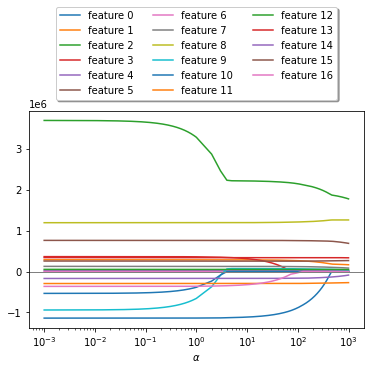

In [71]:
%matplotlib inline

x_range1 = np.linspace(0.001, 1, 1000).reshape(-1,1)
x_range2 = np.linspace(1, 1000, 1000).reshape(-1,1)

x_range = np.append(x_range1, x_range2)
coeff = []

for alpha in x_range: 
    lasso = Lasso(alpha)
    lasso.fit(X_train,y_train)
    coeff.append(lasso.coef_ )
    
coeff = np.array(coeff)

for i in range(0,17):
    plt.plot(x_range, coeff[:,i], label = 'feature {:d}'.format(i))

plt.axhline(y=0, xmin=0.001, xmax=9999, linewidth=1, c ='gray')
plt.xlabel(r'$\alpha$')
plt.xscale('log')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.5),
          ncol=3, fancybox=True, shadow=True)
plt.show()

#### Cross-Validation

In [72]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import cross_val_score

lasso = Lasso(10,max_iter=10000)

scores = cross_val_score(lasso, X_train, y_train)
print("Cross-validation scores: {}".format(scores))

Cross-validation scores: [0.68485364 0.64005769 0.69399588 0.71204542 0.69913661]


In [73]:
scores = cross_val_score(lasso, X_train, y_train, cv=5)
print("Cross-validation scores: {}".format(scores))

Cross-validation scores: [0.68485364 0.64005769 0.69399588 0.71204542 0.69913661]


In [74]:
print("Average cross-validation score: {:.4f}".format(scores.mean()))

Average cross-validation score: 0.6860


### SVM simple regressor

In [75]:
from sklearn.svm import LinearSVR
from sklearn import svm, datasets
from sklearn.model_selection import GridSearchCV

param_grid = {'C':[0.1, 1, 10], 'epsilon': [0.1, 1, 10]}
grid_linsvm = GridSearchCV(LinearSVR(), param_grid, cv=5, return_train_score=True)
grid_linsvm.fit(X_train, y_train)

print("Best parameters: {}".format(grid_linsvm.best_params_))

print('Mean Train Score',grid_linsvm.cv_results_['mean_train_score'])
print('Mean Test Score',grid_linsvm.cv_results_['mean_test_score'])
print('R-squared score (training): {:.3f}'
     .format(grid_linsvm.score(X_train, y_train)))
print('R-squared score (test): {:.3f}'
     .format(grid_linsvm.score(X_test, y_test)))

Best parameters: {'C': 10, 'epsilon': 1}
Mean Train Score [-2.14073066 -2.14073066 -2.14073066 -1.87986671 -1.87986671 -1.87986671
 -0.41238732 -0.41218319 -0.412406  ]
Mean Test Score [-2.19001068 -2.19001068 -2.19001068 -1.92267078 -1.92267078 -1.92267078
 -0.42031559 -0.42003076 -0.42033011]
R-squared score (training): -0.317
R-squared score (test): -0.301


### SVM with kernel regressor

#### rbf

In [76]:
from sklearn.svm import SVR
param_grid = {'C':[0.01, 0.1, 1, 10,100], 'gamma': [0.01, 0.1, 1, 10]}
grid_kernelsvm = GridSearchCV(SVR(kernel = 'rbf'), param_grid, cv= 5, return_train_score=True)
grid_kernelsvm.fit(X_train, y_train)

print("Best parameters: {}".format(grid_kernelsvm.best_params_))

print('Train score: {:.4f}'.format(grid_kernelsvm.score(X_train,y_train)))
print('Test score: {:.4f}'.format(grid_kernelsvm.score(X_test, y_test)))
print('Mean Train Score',grid_kernelsvm.cv_results_['mean_train_score'])
print('Mean Test Score',grid_kernelsvm.cv_results_['mean_test_score'])
print('R-squared score (training): {:.3f}'
     .format(grid_kernelsvm.score(X_train, y_train)))
print('R-squared score (test): {:.3f}'
     .format(grid_kernelsvm.score(X_test, y_test)))

Best parameters: {'C': 100, 'gamma': 1}
Train score: 0.0970
Test score: 0.1091
Mean Train Score [-0.05868057 -0.05867805 -0.0586661  -0.05867294 -0.0586778  -0.05865267
 -0.05853092 -0.05860144 -0.05865021 -0.05838939 -0.05705841 -0.05785865
 -0.05836411 -0.05564994 -0.04232255 -0.05019061 -0.0553929  -0.02832688
  0.07262967  0.01548871]
Mean Test Score [-0.05900567 -0.05900315 -0.05899117 -0.05899803 -0.0590029  -0.05897778
 -0.05885565 -0.05892653 -0.05897535 -0.05871441 -0.05735753 -0.05817356
 -0.0586894  -0.05594423 -0.04235677 -0.05034834 -0.05569031 -0.02826779
  0.07481499  0.01685087]
R-squared score (training): 0.097
R-squared score (test): 0.109


#### poly

In [77]:
from sklearn.svm import SVR
param_grid = {'C':[0.01, 0.1, 1, 10, 100], 'gamma': [0.01, 0.1, 1, 10]}
grid_kernelsvm = GridSearchCV(SVR(kernel = 'poly'), param_grid, cv= 5, return_train_score=True)
grid_kernelsvm.fit(X_train, y_train)

print("Best parameters: {}".format(grid_kernelsvm.best_params_))

print('Train score: {:.4f}'.format(grid_kernelsvm.score(X_train,y_train)))
print('Test score: {:.4f}'.format(grid_kernelsvm.score(X_test, y_test)))
print('Mean Train Score',grid_kernelsvm.cv_results_['mean_train_score'])
print('Mean Test Score',grid_kernelsvm.cv_results_['mean_test_score'])
print('R-squared score (training): {:.3f}'
     .format(grid_kernelsvm.score(X_train, y_train)))
print('R-squared score (test): {:.3f}'
     .format(grid_kernelsvm.score(X_test, y_test)))

Best parameters: {'C': 100, 'gamma': 10}
Train score: 0.8166
Test score: 0.7893
Mean Train Score [-0.05868086 -0.05868048 -0.05827474  0.21579992 -0.05868085 -0.05867701
 -0.054415    0.5980783  -0.05868082 -0.05864206 -0.01660786  0.74087619
 -0.05868048 -0.05827474  0.21579992  0.78798079 -0.05867701 -0.054415
  0.5980783   0.81559983]
Mean Test Score [-0.05900595 -0.05900559 -0.05860328  0.21763419 -0.05900595 -0.05900214
 -0.05472309  0.59775084 -0.05900592 -0.05896754 -0.01648185  0.73600609
 -0.05900559 -0.05860328  0.21763419  0.7800409  -0.05900214 -0.05472309
  0.59775084  0.7985247 ]
R-squared score (training): 0.817
R-squared score (test): 0.789


#### linear

In [78]:
from sklearn.svm import SVR
param_grid = {'C':[0.01, 0.1, 1, 10, 100], 'gamma': [0.01, 0.1, 1, 10,]}
grid_kernelsvm = GridSearchCV(SVR(kernel = 'linear'), param_grid, cv= 5, return_train_score=True)
grid_kernelsvm.fit(X_train, y_train)

print("Best parameters: {}".format(grid_kernelsvm.best_params_))

print('Train score: {:.4f}'.format(grid_kernelsvm.score(X_train,y_train)))
print('Test score: {:.4f}'.format(grid_kernelsvm.score(X_test, y_test)))
print('Mean Train Score',grid_kernelsvm.cv_results_['mean_train_score'])
print('Mean Test Score',grid_kernelsvm.cv_results_['mean_test_score'])
print('R-squared score (training): {:.3f}'
     .format(grid_kernelsvm.score(X_train, y_train)))
print('R-squared score (test): {:.3f}'
     .format(grid_kernelsvm.score(X_test, y_test)))

Best parameters: {'C': 100, 'gamma': 0.01}
Train score: 0.1107
Test score: 0.1164
Mean Train Score [-0.0586654  -0.0586654  -0.0586654  -0.0586654  -0.05852603 -0.05852603
 -0.05852603 -0.05852603 -0.05699396 -0.05699396 -0.05699396 -0.05699396
 -0.04178666 -0.04178666 -0.04178666 -0.04178666  0.08210438  0.08210438
  0.08210438  0.08210438]
Mean Test Score [-0.05899052 -0.05899052 -0.05899052 -0.05899052 -0.05885136 -0.05885136
 -0.05885136 -0.05885136 -0.05729904 -0.05729904 -0.05729904 -0.05729904
 -0.04192854 -0.04192854 -0.04192854 -0.04192854  0.08338604  0.08338604
  0.08338604  0.08338604]
R-squared score (training): 0.111
R-squared score (test): 0.116


### <font color='red'>  Best regression model is the KNN Regressor with k = 6  which has accuracy of 0.806.